In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


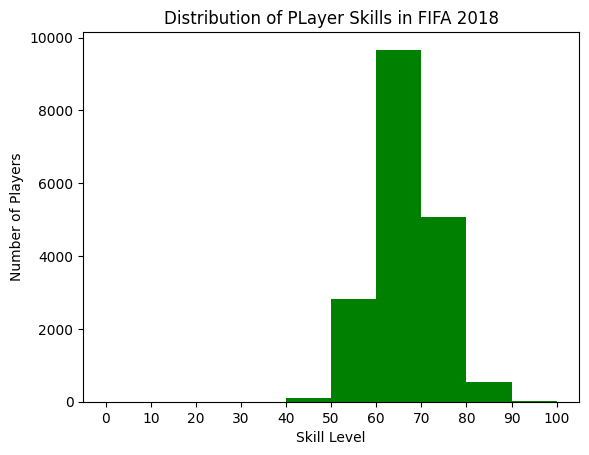

In [63]:

bins = [0, 10, 20 , 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(fifa.Overall, bins=bins, color = 'green')
plt.xticks(bins)
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of PLayer Skills in FIFA 2018')
plt.show()

In [64]:
fifa['Preferred Foot']

,Preferred Foot
0,Left
1,Right
2,Right
3,Right
4,Right
...,...
18202,Right
18203,Right
18204,Right
18205,Right


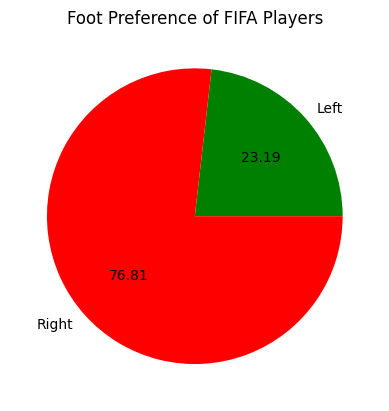

In [65]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count().iloc[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count().iloc[0]

plt.pie([left, right], labels=['Left', 'Right'], colors=['green', 'red'], autopct='%.2f')
plt.title('Foot Preference of FIFA Players')
plt.show()


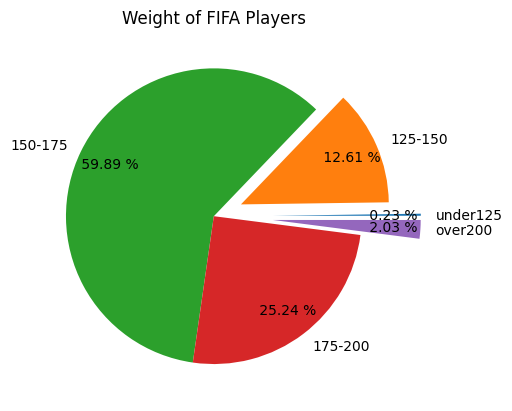

In [66]:
fifa.Weight = [int(x.strip('lbs')) if isinstance(x, str) else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count().iloc[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count().iloc[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count().iloc[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count().iloc[0]
heavy = fifa.loc[fifa.Weight >= 200].count().iloc[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['under125','125-150','150-175','175-200','over200']
explode = (.4,.2,0,0,.4)
plt.pie(weights, labels = labels, autopct = '% .2f %%',pctdistance=0.8,explode=explode)
plt.title('Weight of FIFA Players')
plt.show()

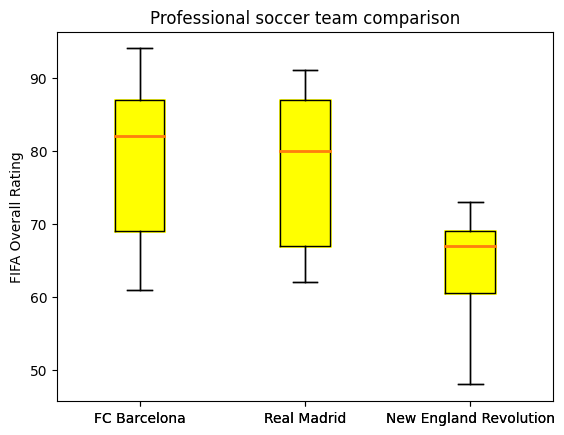

In [67]:
plt.style.use('default')
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
revs = fifa.loc[fifa.Club=='New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real Madrid','New England Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels,patch_artist=True,medianprops={'linewidth':2})
# colors = ['green', 'red', 'blue']
for box in boxes['boxes']:
  box.set(color='yellow', linewidth=2)

plt.boxplot([barcelona, madrid, revs], labels = labels)
plt.title('Professional soccer team comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()